# Machine learning for Regression

In [2]:
import pandas as pd
import numpy as np

## 1. Data preparation

In [3]:
n = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv"

In [4]:
!wget $n # for downloading the n via wget 

--2025-10-07 11:34:45--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M   922KB/s    in 1.6s    

2025-10-07 11:34:47 (922 KB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [5]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
# Normalizing the headings of the n to all lowercase and replacing the spaces with _
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
# Now we will do the same for all the n strings values (they are called object)
strings = list(df.dtypes[df.dtypes == "object"].index)
# This will give all the indexes which have object values, whom n we will normalize
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2. Exploratory n analysis

In [9]:
# for overview of the n
for col in df.columns:
    print(col) # prints columns name
    print(df[col].unique()[:5]) # prints 5 unique values in it
    print(df[col].nunique()) # prints total number of unique values
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Distribution of Price

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# to make sure all the plots can be viewed here

<Axes: xlabel='msrp', ylabel='Count'>

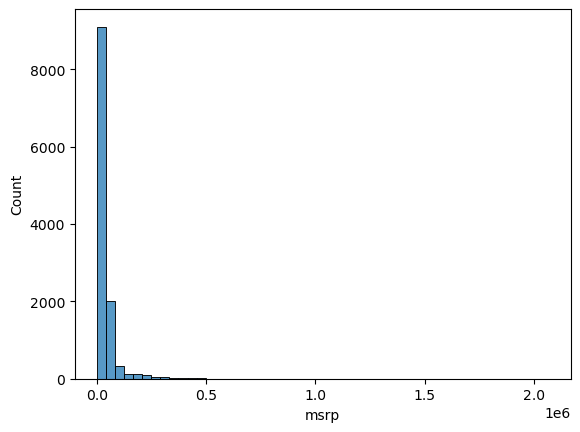

In [11]:
sns.histplot(df.msrp, bins = 50) # histplot for histogram and bins is total number of bars
# the chart below shows the price of cars in million (1e6) and how many of them are there, ex almost all of the cars are below 0.25 million

<Axes: xlabel='msrp', ylabel='Count'>

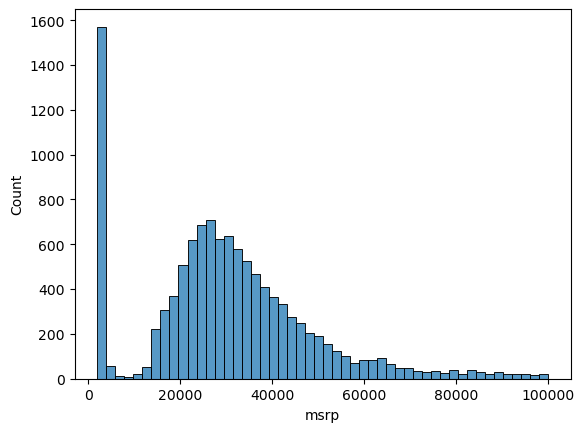

In [12]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)
# cars price below 100,000 

<Axes: xlabel='msrp', ylabel='Count'>

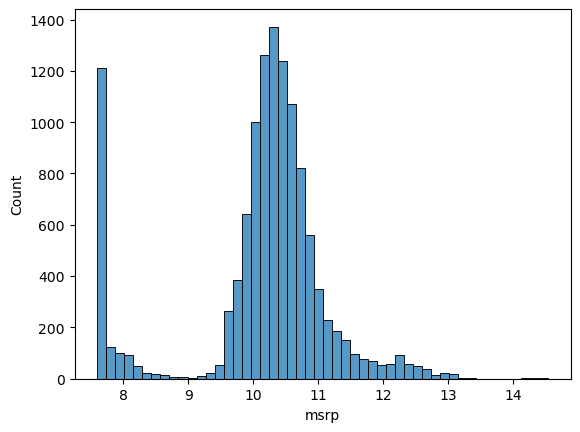

In [13]:
# The values are very few after certain price which is called tail- it may confuse our model, to fix that we normalize the prices. To do that we will use log 
price_log = np.log1p(df.msrp) # log1p to take all the positive values
sns.histplot(price_log, bins = 50)

### Missing values

In [14]:
df.isnull().sum() # sum of all the null values by index

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 3. Setting up the validation framework

In [15]:
# First we split the data into training, validation and testing
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)
n_val, n_test, n_train


(2382, 2382, 7150)

In [16]:
d_train = df.iloc[:n_train]
d_val = df.iloc[n_train:n_train+n_val]
d_test = df.iloc[n_train+n_val:]

In [17]:
# but there's a problem, the data is in sequence and we need it to be random. Therefore we have to suffle the data for proper prediction 

idx = np.arange(n)
np.random.seed(2) # to get the same random order as the instructor
np.random.shuffle(idx)

In [18]:
d_train = df.iloc[idx[:n_train]]
d_val = df.iloc[idx[n_train: n_train+n_val]]
d_test = df.iloc[idx[n_train+n_val:]]

In [19]:
# now we resets the index as it is shuffled 
d_train = d_train.reset_index(drop=True)
d_val = d_val.reset_index(drop=True)
d_test = d_test.reset_index(drop=True)

In [20]:
# now we transform data via log 
y_train = np.log1p(d_train.msrp.values)
y_val = np.log1p(d_val.msrp.values)
y_test = np.log1p(d_test.msrp.values)

In [21]:
# finally we delete the msrp columns to prevent data leakage 
del d_train["msrp"]
del d_val["msrp"]
del d_test["msrp"]

## 4. Linear Regression

In [22]:
# ex - a simple linear regression function
fe = [435, 11, 16] # feature vector
w = [0.01, 0.03, 0.002] # weights of features
w0 = 5.5 # base value

def linear_regression(fe):
    n = len(fe) # to loop through the features
    pred = w0 # out prediction vairable

    for j in range(n):
        pred += w[j] * fe[j] # predication = base value + (features * their weights) for all the features

    return pred

linear_regression(fe)

10.212000000000002

In [23]:
np.expm1(linear_regression(fe)) # it undo's the log fn and in this case gives us the price of the car

np.float64(27226.969108004363)

## 5. Linear Regression: Vector form

In [24]:
# using dot fn 
def linear_regression(fe):
    return w0 + np.array(fe).dot(np.array(w))

linear_regression(fe)

np.float64(10.212)

In [25]:
# combining the base value 
w_new = [w0]+ w

def linear_regression(fe):
    fe = [1] + fe
    return np.array(fe).dot(np.array(w_new)) 

linear_regression(fe)

np.float64(10.212000000000002)

In [26]:
# in short linear regression is matrix multiplication, here's the example
w_new = [w0]+ w

x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)

def linear_regression(X):
    return X.dot(w_new)

linear_regression(X)

array([10.47 , 11.632, 10.532])

## 6 Training Linear Regression: Normal Equation

In [36]:
# simple implementation of normal eqn for linear regression
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]

X = np.array(X)
ones = np.ones(X.shape[0]) # for bias term
X = np.column_stack([ones, X]) # adding it to X
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.300e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [38]:
# We will implement this formula - w = (X^T. X)^-1.X^T.y - which is a normal eqn for linear regression
xtx = X.T.dot(X)
xtx_inv = np.linalg.inv(xtx)
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

w_f = xtx_inv.dot(X.T).dot(y)

w0 = w_f[0]
w = w_f[1:]


In [40]:
w0, w # w0 is bias term (base value) and w is weights of features which are in nagative in this case which means they decrace the value

(np.float64(300.0925292276671), array([-0.22783969, -2.57690874, -0.02303228]))

In [41]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    xtx = X.T.dot(X)
    xtx_inv = np.linalg.inv(xtx) 

    w_f = xtx_inv.dot(X.T).dot(y)

    w0 = w_f[0]
    w = w_f[1:]

    return w0, w



In [42]:
train_linear_regression(X, y)

(np.float64(1.1803887523479433e+19),
 array([-1.18038875e+19,  2.65523467e-01,  2.45817993e-14, -6.94661137e-01]))

## 7.  Baseline Model for Car Price Prediction 

In [46]:
d_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [53]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] # extracting all the features we need 
X_train = d_train[base].fillna(0).values # filling all the null values with 0's 

In [56]:
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w) # base value + features * weights 
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

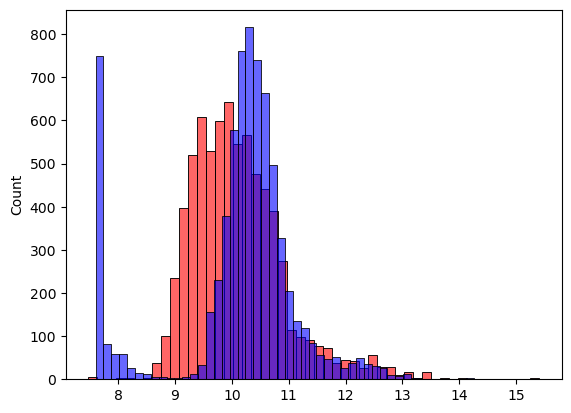

In [62]:
# visualizing the predictions
sns.histplot(y_pred, color="red", alpha=0.6, bins=50)
sns.histplot(y_train, color="blue", alpha=0.6, bins=50)

# red is prediction and blue is target

## 8. RMSE

In [63]:
def rmse(y, y_pred):
    e = y-y_pred
    se = e ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse


In [64]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## 9. 